## ¿Qué es el histograma de una imágen?

Un histograma es un tipo de gráfico que toma como eje de absisas las intensidades (0 a 255) y en el eje de las ordenadas cuantos pixeles poseen a dicha intensidad. En otras palabras, indica para cada valor de intensidad su frecuencia de aparición en la imágen.

A su vez las intensidades pueden agruparse por niveles. Los niveles se definen como nivel = 2 ** K. Entonces, para un nivel i dado, se contabilizaran en rango de valores de intensidad que van de i * 256/cantidad_de_niveles a (i+1) * 256/cantidad_de_niveles - 1.

256/cantidad_de_niveles será el rango de intensidades agrupadas por un nivel.

In [1]:
import numpy as np
from pathlib import Path
import skimage

In [2]:
ASSETS_FOLDER_PATH = "./assets"
OUTPUT_FOLDER_PATH = "."

In [3]:
Path(OUTPUT_FOLDER_PATH).mkdir(parents=True, exist_ok=True)

Cargamos la imagen

In [4]:
lena = skimage.io.imread(fname=f"{ASSETS_FOLDER_PATH}/lena_gray.tif")

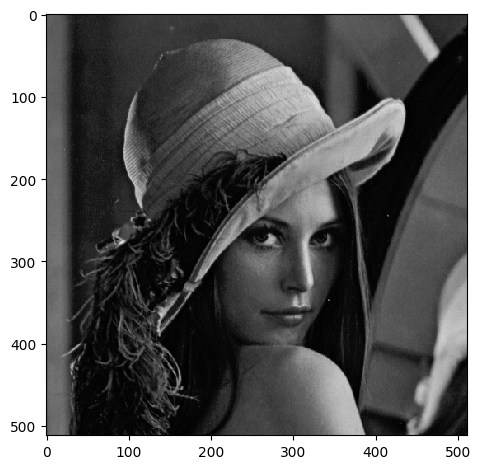

In [5]:
skimage.io.imshow(lena)

In [6]:
def generate_histogram(image: np.ndarray, K: int = None) -> dict[int, int]:
    frequency_map = dict.fromkeys(range(0, 256), 0)
    for n_row in range(image.shape[0]):
        for n_col in range(image.shape[1]):
            pixel_intensity = image[n_row][n_col]
            frequency_map[pixel_intensity] += 1

    if K is None:
        return frequency_map
    
    levels = 2 ** K
    assert  256 % levels == 0, "256 should be divisible by levels"

    level_range = int(256/levels)
    level_frequency_map = dict.fromkeys(range(0, level_range), 0)
    for k in range(levels):
        for i in range(level_range):
            intensity_value = k*level_range + i
            level_frequency_map[k] += frequency_map[intensity_value]

    return level_frequency_map

In [7]:
frequency_map = generate_histogram(lena)
level_frequency_map = generate_histogram(lena, K=4)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

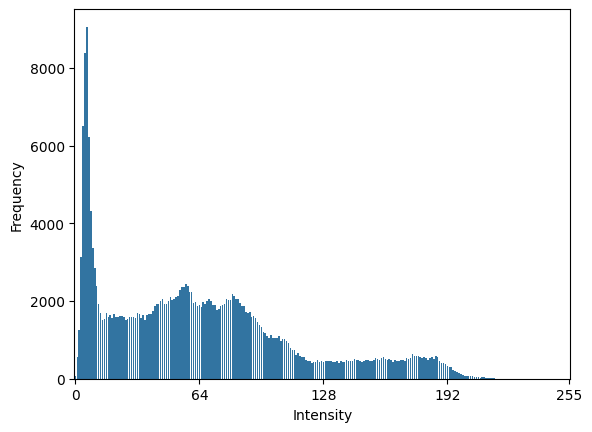

In [9]:
ax = sns.barplot(frequency_map)
ax.set_xticks([0, 64, 128, 192, 255])
plt.ylabel("Frequency")
plt.xlabel("Intensity")
plt.show()

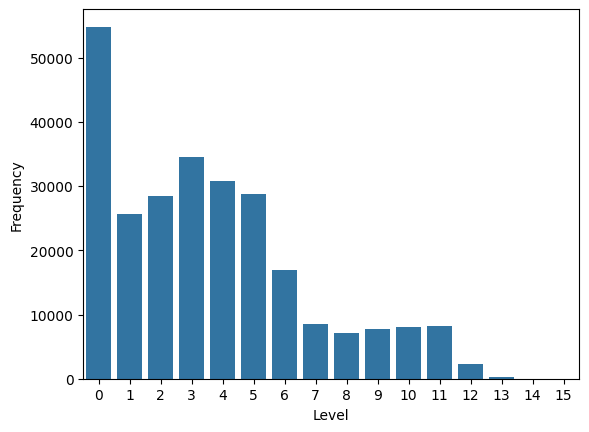

In [10]:
sns.barplot(level_frequency_map)
plt.ylabel("Frequency")
plt.xlabel("Level")
plt.show()